In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json


Using TensorFlow backend.
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
data['v2'] = data['v2'].apply(lambda x: x.lower())
data['v2'] = data['v2'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

In [4]:
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

In [5]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)

X = pad_sequences(X)
print(X)


[[   0    0    0 ...   67   58  137]
 [   0    0    0 ...  443    6 1823]
 [   0    0    0 ...  459   79  382]
 ...
 [   0    0    0 ...   12   19  231]
 [   0    0    0 ...  198   12   50]
 [   0    0    0 ...    1   41  258]]


In [6]:
embed_dim = 128
lstm_out = 196
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model


In [7]:
model = createmodel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 152, 128)          256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['v1'])
y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(3733, 152) (3733, 2)
(1839, 152) (1839, 2)


In [9]:
batch_size = 32
model = createmodel()
history = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2,validation_data=(X_test, Y_test))
model.save('spam.h5')



Train on 3733 samples, validate on 1839 samples
Epoch 1/5
 - 38s - loss: 0.1823 - accuracy: 0.9387 - val_loss: 0.0769 - val_accuracy: 0.9831
Epoch 2/5
 - 40s - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0686 - val_accuracy: 0.9810
Epoch 3/5
 - 43s - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0759 - val_accuracy: 0.9793
Epoch 4/5
 - 43s - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0923 - val_accuracy: 0.9815
Epoch 5/5
 - 42s - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0872 - val_accuracy: 0.9788


In [10]:
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
print(score)
print(acc)
print(model.metrics_names)

0.09342759889750546
0.9825992584228516
['loss', 'accuracy']


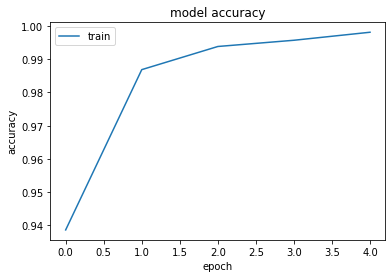

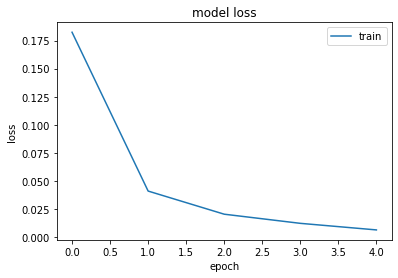

In [10]:
#Bonus question
#accuracy
pyplot.plot(history.history['accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

# loss
pyplot.plot(history.history['loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper right')
pyplot.show()